# **Perkenalan**

**Pokemon Analysis** 

by: Haikal Ramadhan Usman

Dataset yang akan digunakan diambil dari link https://www.kaggle.com/abcsds/pokemon. Dataset ini berisi 721 Pokemon. Data tersebut memiliki beberapa kolom yaitu:

1. #: ID dari setiap pokemon
2. Name: nama dari setiap pokemon
3. Type 1: Tipe dari pokemon
4. Type 2: Beberapa pokemon memiliki 2 tipe
5. Total: Total kekuatan yang dimiliki pokemon
6. HP: Hit point
7. Attack: Kekuatan attack dari pokemon
8. Defense: berapa banyak kerusakan yang diterima Pokémon ketika dipukul dengan gerakan fisik
9. SP Atk: Special Attack
10. SP Def: Special Defense
11. Speed: menentukan pokemon mana yang attack duluan


**Tujuan dari analisis ini adalah:**
1. Mencari Pokemon terkuat berdasarkan Total kekuatan nya.
2. Mencari Pokemon terlemah berdasarkan Total kekuatan nya.
3. Mencari rata-rata Total kekuatan pokemon
4. Menghitung jumlah tipe terbanyak

Untuk menggunakan API kaggle, bisa menggunakan kaggle.json. kaggle.json bisa diambil di https://www.kaggle.com/ lalu ke halaman account lalu klik Create New API. File Kaggle.json akan terunduh lalu untuk upload kaggle.json menggunakan syntax berikut:

In [81]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"haikalramadhanusman","key":"cefd766b972f55aed9f6c178a3d98dad"}'}

In [84]:
# Bikin directory dengan nama kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [85]:
!kaggle datasets download -d abcsds/pokemon

pokemon.zip: Skipping, found more recently modified local copy (use --force to force download)


**Download Dataset:**

In [86]:
from zipfile import ZipFile
file_name = "pokemon.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


# **Import Library**

Pertama-tama melakukan import library yang akan dipakai yaitu pandas, numpy dan matplotlib.

In [87]:
import pandas as pd
import numpy as np
%matplotlib inline

# **Data Loading**

Menggunakan pd.read_csv untuk mengambil dataset lalu menyimpannya sebagai Dataframe

In [88]:
df = pd.read_csv('Pokemon.csv')

In [89]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Untuk melihat 10 data teratas menggunakan .head(10)

In [90]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Untuk mencari tau data type dari setiap kolom menggunakan .info(). Bisa melihat kolom non-null juga (kolom yang terisi).

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [92]:
df.shape

(800, 13)

From 3 tables above, we can see that from 800 data in column 'Type 2', only 414 of them is filled. That means there are 386.

# **Data Cleaning**

## Mencari Missing values dalam dataset

Jika dilihat pada .info(), dari 800 data yang ada di kolom 'Type 2', hanya ada 414 yang terisi. Artinya ada 386 yang null. Untuk itu saya mencoba untuk menampilkan kolom 'Type 2' untuk melihat apakah ada yang null.

In [93]:
df['Type 2']

0      Poison
1      Poison
2      Poison
3      Poison
4         NaN
        ...  
795     Fairy
796     Fairy
797     Ghost
798      Dark
799     Water
Name: Type 2, Length: 800, dtype: object

Dari tampilan diatas, bisa dilihat ada NaN. butuh perintah .isnull() untuk melihat apakah data tersebut benar kosong atau tidak.

In [94]:
df['Type 2'].isnull()

0      False
1      False
2      False
3      False
4       True
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Type 2, Length: 800, dtype: bool

In [95]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [96]:
df.isnull().sum().sum()

386

Dari data diatas, kita bisa lihat bahwa missing value hanya berada di kolom 'Type 2.' Ini karena beberapa pokemon hanya memiliki 1 tipe.

## Menagani Missing data.

Dalam menagani missing data tersebut, saya mengisi kolom 'Type 2' yang kosong dengan nilai yang sama dengan 'Type 1' dari pokemon tersebut.

In [97]:
df['Type 2'].fillna(df['Type 1'], inplace=True)

Mengecek kembali apakah masih ada missing data.

In [98]:
df.isnull().values.any()

False

In [99]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False


## Manipulasi kolom.

Menghapus kolom yang tidak digunakan:

In [100]:
df.drop(['Legendary'], axis=1, inplace=True)

Mengganti nama kolom agar lebih jelas.

In [102]:
df.rename(columns={u'#':u'Pokemon ID', u'Sp. Atk':u'Special Attack', u'Sp. Def': u'Special Defense'}, inplace=True)

In [103]:
df.head(10)

,Pokemon ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1


Jika dilihat dari table diatas, ada beberapa pokemon yang mempunya id yang sama. Menurut saya id itu harus unique sehingga tidak ada 2 atau lebih pokemon yang mempunya id yang sama. Disini saya akan menghapus id yang duplikat dan memakai data pokemon yang paling pertama.

In [104]:
df.drop_duplicates(subset=['Pokemon ID'], keep='first', inplace=True)

In [105]:
df.head(10)

,Pokemon ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1
10,8,Wartortle,Water,Water,405,59,63,80,65,80,58,1
11,9,Blastoise,Water,Water,530,79,83,100,85,105,78,1
13,10,Caterpie,Bug,Bug,195,45,30,35,20,20,45,1


In [106]:
pokemon = df.copy()

In [107]:
pokemon.head()

,Pokemon ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1


# **Explorasi Data**

## Query Data

Query data untuk pokemon yang memiliki Total kekuatan diatas rata-rata:

In [108]:
rata2=pokemon['Total'].mean()
rata2

417.94590846047157

In [109]:
pokemon[(pokemon['Total']>rata2)]

,Pokemon ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1
11,9,Blastoise,Water,Water,530,79,83,100,85,105,78,1
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1
27,22,Fearow,Normal,Flying,442,65,90,65,61,61,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6


Query data untuk pokemon yang memiliki Total kekuatan paling kuat:

In [110]:
strongest=pokemon['Total'].max()
strongest

720

In [111]:
pokemon[(pokemon['Total']==strongest)]

,Pokemon ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation
552,493,Arceus,Normal,Normal,720,120,120,120,120,120,120,4


Query data untuk pokemon yang memiliki Total kekuatan paling lemah:

In [112]:
weakest=pokemon['Total'].min()
weakest

180

In [113]:
pokemon[(pokemon['Total']==weakest)]

,Pokemon ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation
206,191,Sunkern,Grass,Grass,180,30,30,30,30,30,30,2


## Grouping

Grouping data berdasarkan tipe

In [114]:
pokemon.groupby(['Type 1'])['Type 1'].count()

Type 1
Bug          63
Dark         28
Dragon       24
Electric     36
Fairy        17
Fighting     25
Fire         47
Flying        3
Ghost        23
Grass        66
Ground       30
Ice          23
Normal       93
Poison       28
Psychic      47
Rock         41
Steel        22
Water       105
Name: Type 1, dtype: int64

Grouping data dengan menghitung Type 1 dari pokemon yang memiliki Total kekuatan diatas rata-rata:

In [115]:
pokemon[
               (pokemon['Total']>rata2)
].groupby(['Type 1'])['Type 1'].count()

Type 1
Bug         21
Dark        17
Dragon      17
Electric    19
Fairy        8
Fighting    13
Fire        25
Flying       2
Ghost       13
Grass       32
Ground      16
Ice         13
Normal      43
Poison      14
Psychic     27
Rock        21
Steel       16
Water       55
Name: Type 1, dtype: int64

Grouping data dengan menghitung Type 1 dari pokemon Generasi terakhir yang memiliki Total kekuatan dibawah rata-rata:

In [116]:
lastGen=pokemon['Generation'].max()
lastGen

6

In [122]:
pokemon[
               (pokemon['Total']<rata2) & (pokemon['Generation']==lastGen)
].groupby(['Type 1'])['Type 1'].count()

Type 1
Bug         3
Dark        1
Dragon      1
Electric    1
Fairy       4
Fighting    1
Fire        4
Flying      1
Ghost       2
Grass       3
Ice         1
Normal      2
Poison      1
Psychic     1
Rock        3
Steel       1
Water       3
Name: Type 1, dtype: int64

## Visualisasi Data

Menghitung tipe terbanyak berdasarkan Type 1 lalu memvisualisasikan ke dalam bentuk Bar Plot:

In [118]:
pokemon["Type 1"].value_counts()

Water       105
Normal       93
Grass        66
Bug          63
Fire         47
Psychic      47
Rock         41
Electric     36
Ground       30
Poison       28
Dark         28
Fighting     25
Dragon       24
Ghost        23
Ice          23
Steel        22
Fairy        17
Flying        3
Name: Type 1, dtype: int64

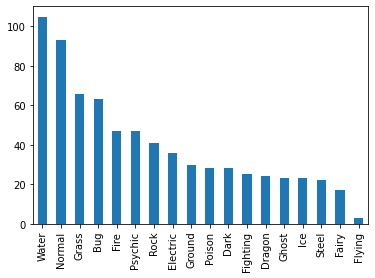

In [119]:
pokemon["Type 1"].value_counts().plot(kind="bar")

Menghitung tipe terbanyak berdasarkan Type 2 yang tidak sama dengan Type 1 lalu memvisualisasikan ke dalam bentuk Bar Plot:

In [120]:
pokemon[
               (pokemon['Type 1']!=pokemon['Type 2'])
].groupby('Type 2')['Type 2'].count()

Type 2
Bug          3
Dark        16
Dragon      14
Electric     6
Fairy       18
Fighting    19
Fire         9
Flying      87
Ghost       12
Grass       18
Ground      30
Ice         10
Normal       4
Poison      31
Psychic     27
Rock        14
Steel       19
Water       13
Name: Type 2, dtype: int64

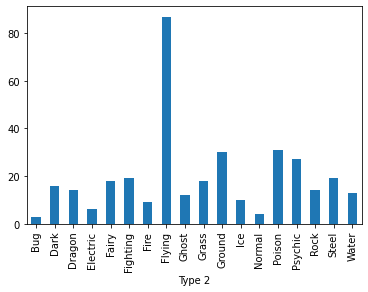

In [121]:
pokemon[
               (pokemon['Type 1']!=pokemon['Type 2'])
].groupby('Type 2')['Type 2'].count().plot(kind='bar')

# **Kesimpulan**

Dari analisis diatas dapat disimpulkan bawha
1. Pokemon terkuat berdasarkan total kekuatannya adalah Arceus dengan ID 493 yang berasal dari generasi 4. Arceus hanya memiliki satu tipe yaitu normal.
2. Pokemon terlemah berdasarkan total kekuatannya adalah Sunkern dengan ID 191 yang berasal dari generasi 2. Sunkern juga hanya memiliki satu tipe yaitu grass.
3. Rata-rata Total kekuatan pokemon adalah 417.94590846047157 dan ada 372 pokemon yang memiliki kekuatan diatas rata.
4. Tipe pokemon terbanyak berdasarkan tipe satu adalah water dengan jumlah 105. Sedangkan berdasarkan tipe kedua adalah Flying dengan jumlah 87.